In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [ ]:
import tensorflow as tf
import os


In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_14704\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [20]:
data_dir = "data"

In [ ]:
os.listdir(os.path.join(data_dir,"happy"))

In [22]:
image_exts = ["jpeg","jpg","bmp","png"]

In [23]:
img = cv2.imread(os.path.join(data_dir,'sad','OIP.abyG0-w10RjLXVwcIUAkXAHaLH.jpg'))

In [24]:
img.shape

(236, 157, 3)

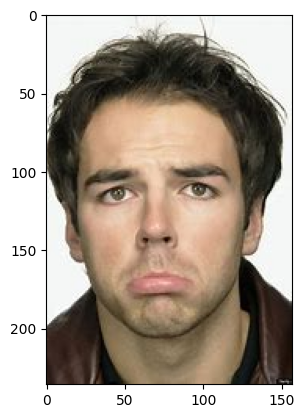

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Load Data

In [27]:
import numpy as np

In [103]:
data = tf.keras.utils.image_dataset_from_directory("data",batch_size=32)

Found 773 files belonging to 2 classes.


In [104]:
type(data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [105]:
data_iterator = data.as_numpy_iterator()

In [106]:
batch = data_iterator.next()

In [107]:
batch[1]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

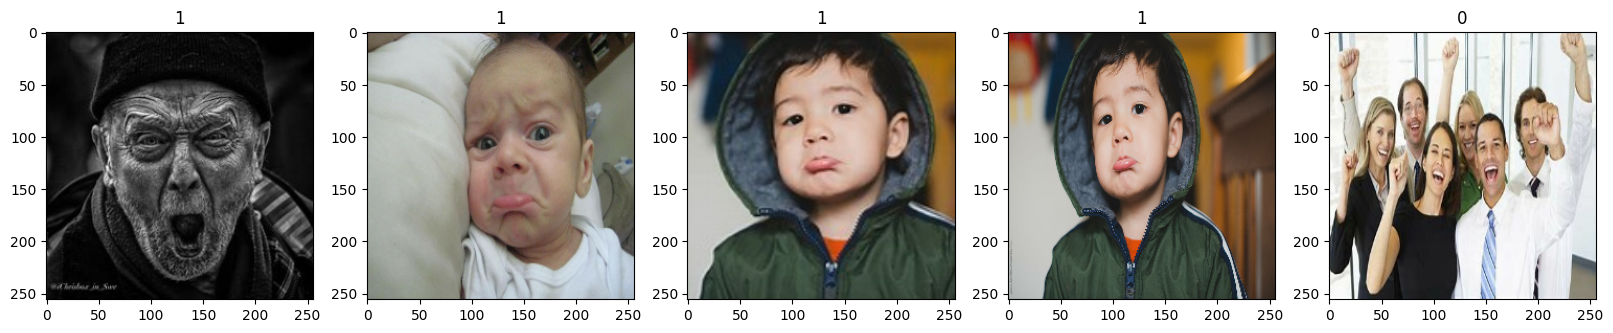

In [108]:
fig,ax = plt.subplots(ncols=5,figsize=  (20,20))
for i,img in enumerate(batch[0][:5]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

In [109]:
#Found that class 0 = Happy Image 
#Found that class 1 = Sad Image

Preprocess the images


In [110]:
batch[0].shape

(32, 256, 256, 3)

In [111]:
batch[0].min()

0.0

In [112]:
batch[0].max()

255.0

In [113]:
scaled.max()

1.0

In [114]:
data = data.map(lambda x,y : (x/255,y))

In [115]:
scaled_iter = data.as_numpy_iterator().next()

In [116]:
scaled_iter[0].max()

1.0

Split The Data

In [117]:
len(data)

25

In [118]:
train_size = int(len(data)*.8)+1
val_size=  int(len(data)*.1)
test_size = int(len(data)*.1)

18+2+2 batches

In [119]:
train_size+val_size+test_size

25

In [120]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [121]:
len(test)

2

Build the model

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Flatten

In [123]:
model = Sequential()

In [124]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation = 'sigmoid'))

In [125]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

Train The Model

In [127]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [128]:
hist = model.fit(train,epochs = 20,validation_data=val,callbacks = [tensorboard_callback])

Epoch 1/20
21/21 [==============================] - 42s 2s/step - loss: 0.8291 - accuracy: 0.5789 - val_loss: 0.6514 - val_accuracy: 0.6719
Epoch 2/20
21/21 [==============================] - 36s 2s/step - loss: 0.5960 - accuracy: 0.6682 - val_loss: 0.4988 - val_accuracy: 0.7812
Epoch 3/20
21/21 [==============================] - 35s 2s/step - loss: 0.5414 - accuracy: 0.7500 - val_loss: 0.4554 - val_accuracy: 0.8750
Epoch 4/20
21/21 [==============================] - 34s 1s/step - loss: 0.3696 - accuracy: 0.8467 - val_loss: 0.2443 - val_accuracy: 0.9375
Epoch 5/20
21/21 [==============================] - 33s 1s/step - loss: 0.2448 - accuracy: 0.8958 - val_loss: 0.1800 - val_accuracy: 0.9688
Epoch 6/20
21/21 [==============================] - 34s 2s/step - loss: 0.1364 - accuracy: 0.9583 - val_loss: 0.0751 - val_accuracy: 0.9688
Epoch 7/20
21/21 [==============================] - 34s 2s/step - loss: 0.1137 - accuracy: 0.9643 - val_loss: 0.1143 - val_accuracy: 0.9688
Epoch 8/20
21/21 [==

In [131]:
hist.history


{'loss': [0.8290776610374451,
  0.5960486531257629,
  0.5414358973503113,
  0.3695700764656067,
  0.2447577267885208,
  0.13639722764492035,
  0.11370080709457397,
  0.0919480174779892,
  0.10653778165578842,
  0.057502489537000656,
  0.07194164395332336,
  0.04120435193181038,
  0.08607689291238785,
  0.07153487205505371,
  0.06417189538478851,
  0.04452667012810707,
  0.029247766360640526,
  0.054313354194164276,
  0.026240700855851173,
  0.03747081756591797],
 'accuracy': [0.5788690447807312,
  0.668154776096344,
  0.75,
  0.8467261791229248,
  0.8958333134651184,
  0.9583333134651184,
  0.9642857313156128,
  0.961309552192688,
  0.9627976417541504,
  0.9776785969734192,
  0.980654776096344,
  0.9851190447807312,
  0.976190447807312,
  0.976190447807312,
  0.976190447807312,
  0.9866071343421936,
  0.9895833134651184,
  0.9836309552192688,
  0.9895833134651184,
  0.9851190447807312],
 'val_loss': [0.6513598561286926,
  0.4988139867782593,
  0.4553687572479248,
  0.24433428049087524,

Plot Performance

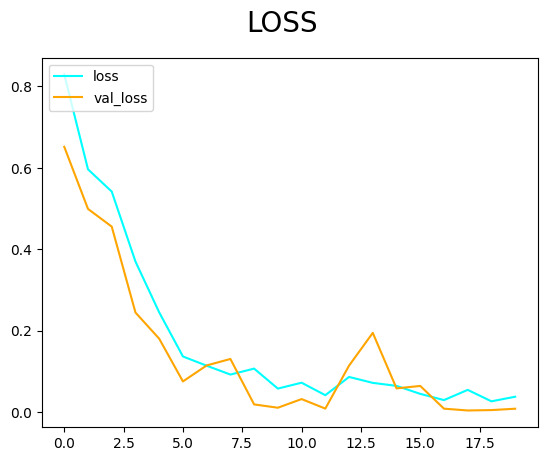

In [137]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'cyan',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
plt.suptitle("LOSS",fontsize =20)
plt.legend(loc = 'upper left')
plt.show()

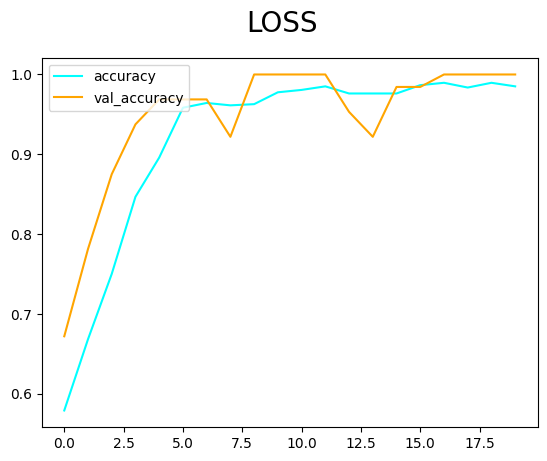

In [138]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'cyan',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
plt.suptitle("LOSS",fontsize =20)
plt.legend(loc = 'upper left')
plt.show()

Evaluate the performance

In [139]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [142]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [143]:
len(test)

2

In [145]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 183ms/step


In [150]:
print('precision:',pre.result().numpy(),", Recall: ",re.result().numpy(),",Accuracy: ",acc.result().numpy())

precision: 1.0 , Recall:  1.0 ,Accuracy:  1.0


Personal test

In [227]:
import cv2
from matplotlib import pyplot as plt

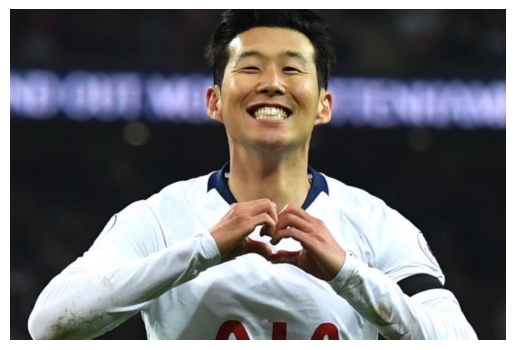

In [228]:
img_happy = cv2.imread('test_image_1.jpg')
plt.imshow(cv2.cvtColor(img_happy,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

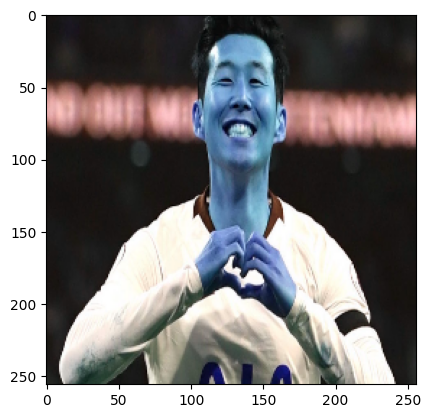

In [230]:
resize_happy = tf.image.resize(img_happy,(256,256))
plt.imshow(resize_happy.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize_happy,0)

In [ ]:
yhat_happy = model.predict(np.expand_dims(resize_happy/255,0))
print(yhat_happy)

In [239]:
if(yhat_happy>0.5):
    print("Prediced images is SAD")
else:
    print("Predicted image is HAPPY")

Predicted image is HAPPY


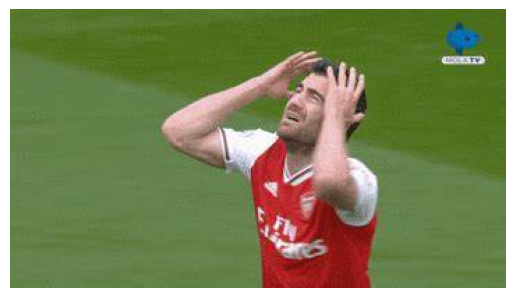

In [240]:
img_sad = cv2.imread('test_image_2.jpg')
plt.imshow(cv2.cvtColor(img_sad,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

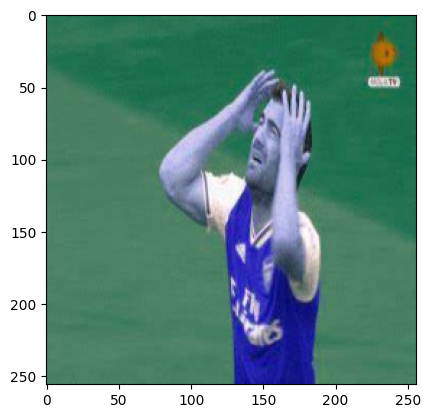

In [241]:
resize_sad = tf.image.resize(img_sad,(256,256))
plt.imshow(resize_sad.numpy().astype(int))
plt.show()

In [242]:
np.expand_dims(resize_sad,0)


array([[[[ 44.      , 123.      ,  90.      ],
         [ 44.      , 123.      ,  90.      ],
         [ 43.023438, 122.02344 ,  89.02344 ],
         ...,
         [ 24.976562, 111.      ,  77.      ],
         [ 24.      , 111.      ,  77.      ],
         [ 24.      , 111.      ,  77.      ]],

        [[ 44.671875, 123.671875,  90.671875],
         [ 44.2782  , 123.2782  ,  90.2782  ],
         [ 43.679565, 122.679565,  89.679565],
         ...,
         [ 25.648438, 111.671875,  77.671875],
         [ 24.671875, 111.671875,  77.671875],
         [ 24.671875, 111.671875,  77.671875]],

        [[ 45.81775 , 123.458374,  90.9115  ],
         [ 45.13269 , 122.773315,  90.22644 ],
         [ 44.90625 , 122.546875,  90.      ],
         ...,
         [ 25.534058, 111.546875,  77.546875],
         [ 25.      , 111.546875,  77.546875],
         [ 25.      , 111.546875,  77.546875]],

        ...,

        [[ 73.546875, 130.54688 ,  99.546875],
         [ 73.546875, 130.54688 ,  99.546875]

In [243]:
yhat_sad = model.predict(np.expand_dims(resize_sad/255,0))
print(yhat_sad)

1/1 [==============================] - 0s 43ms/step
[[0.9817838]]


In [245]:
if(yhat_sad>0.5):
    print("Prediced images is SAD")
else:
    print("Predicted image is HAPPY")

Prediced images is SAD


SAVING

In [246]:
from tensorflow.keras.models import load_model

In [247]:
model.save(os.path.join('models','happysadmodel.h5'))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
